## Exercise for logistic regression

In [2]:
%cd c:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex2\\ex2
%pwd


c:\Users\s\Downloads\machine_learning\machine-learning-ex2\ex2


'c:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex2\\ex2'

### Visualizing the data

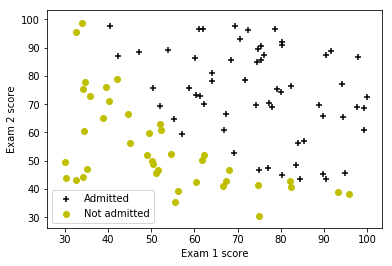

In [3]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('ex2data1.txt', delimiter=',')
x0 = data[:, 0:2]
y0 = data[:, -1][:, np.newaxis]

pos = np.where(y0.flatten() == 1)
neg = np.where(y0.flatten() == 0)

plt.figure(111)
plt.scatter(x0[pos, 0], x0[pos, 1], color='black', marker='+', label='Admitted')
plt.scatter(x0[neg, 0], x0[neg, 1], color='y', marker='o', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')
plt.show()

### Warmup exercise: sigmoid function

In [4]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    
    return g

### Cost function and gradient

In [32]:
def cost_function(x_mat, y, theta):
    j = -1 / y.shape[0] * np.sum(y * np.log(sigmoid(x_mat.dot(theta))) + (1 - y) * np.log(1 - sigmoid(x_mat.dot(theta))))
    grad = 1 / y.shape[0] * x_mat.T.dot(sigmoid(x_mat.dot(theta)) - y)
    
    return j, grad

x0_mat = np.hstack((np.ones((y0.shape[0], 1)), x0))
initial_theta = np.zeros((x0_mat.shape[1], 1))
j0, grad0 = cost_function(x0_mat, y0, initial_theta)
print(j0, grad0)

test_theta = np.array([[-24], [0.2], [0.2]])
print(cost_function(x0_mat, y0, test_theta))

0.6931471805599453 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
[ -0.1        -12.00921659 -11.26284221]
(0.21833019382659774, array([[0.04290299],
       [2.56623412],
       [2.64679737]]))


### Learning parameters using advanced optimization

In [43]:
from scipy import optimize


def f(theta, x_mat, y):
    theta = theta.reshape(-1, 1)
    j = -1 / y.shape[0] * np.sum(y * np.log(sigmoid(x_mat.dot(theta))) + (1 - y) * np.log(1 - sigmoid(x_mat.dot(theta))))
    
    return j


def f_grad(theta, x_mat, y):
    theta = theta.reshape(-1, 1)
    grad = 1 / y.shape[0] * x_mat.T.dot(sigmoid(x_mat.dot(theta)) - y)
   
    return grad.ravel()


res = optimize.fmin_bfgs(f, initial_theta.ravel(), args=(x0_mat, y0), fprime=f_grad)
print(res)


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
[-25.16133284   0.2062317    0.2014716 ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
